<h2>EDA on Online Sales Data</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest

In [2]:
# Set visual display settings
sns.set(style='whitegrid')

<h4>Load CSV</h4>

In [3]:
original_df = pd.read_csv('online_retail_sales_dataset.csv')

<h4>DF Overview</h4>

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   transaction_id     1000000 non-null  int64  
 1   timestamp          1000000 non-null  object 
 2   customer_id        1000000 non-null  int64  
 3   product_id         1000000 non-null  int64  
 4   product_category   1000000 non-null  object 
 5   quantity           1000000 non-null  int64  
 6   price              1000000 non-null  float64
 7   discount           1000000 non-null  float64
 8   payment_method     1000000 non-null  object 
 9   customer_age       1000000 non-null  int64  
 10  customer_gender    1000000 non-null  object 
 11  customer_location  1000000 non-null  object 
 12  total_amount       1000000 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 99.2+ MB


In [5]:
original_df.shape

(1000000, 13)

<h4>Sampling</h4>

In [6]:
df = original_df.sample(n=1000, random_state=1)  # random_state is optional for reproducibility

In [7]:
df.shape

(1000, 13)

<h4>Handling Missisng Values</h4>

In [8]:
# identify columns with missing values
df.isnull().sum()

transaction_id       0
timestamp            0
customer_id          0
product_id           0
product_category     0
quantity             0
price                0
discount             0
payment_method       0
customer_age         0
customer_gender      0
customer_location    0
total_amount         0
dtype: int64

In [9]:
# for numeric column
# df['col'] = df['col'].fillna(0)

# for non-numer cols replace with appropriate string
# df['col'] = df['col'].fillna('blah!')

<h3>Handling Duplicate Rows</h3>

In [10]:
# check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [11]:
# remove duplicate rows
df = df.drop_duplicates()

<h3>Standardizing formats</h3>

In [12]:
# Format to ISO 8601 (YYYY-MM-DD)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date

<h4><h4>Normalizing Data</h4></h4>

In [13]:
# rescales the data to a fixed range, typically [0, 1]. 
# to maintain data integrity and prevent anomalies during data operations
# identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Normalizing numerical columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized DataFrame
df.head()

,transaction_id,timestamp,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount
276826,0.276920,2023-07-12,0.215269,0.732441,Home & Kitchen,0.875,0.323710,0.36,Credit Card,0.019608,Other,Africa,0.252606
849425,0.850806,2024-08-12,0.348936,0.928651,Home & Kitchen,0.125,0.626375,0.74,Gift Card,0.588235,Male,Asia,0.091266
504499,0.505105,2023-12-17,0.031539,0.239688,Home & Kitchen,0.125,0.557699,0.56,PayPal,0.450980,Female,Africa,0.093093
601054,0.601877,2024-02-22,0.125156,0.812709,Sports & Outdoors,0.875,0.412644,0.02,Debit Card,0.156863,Female,North America,0.387182
980221,0.981896,2024-11-11,0.691364,0.236343,Clothing,0.125,0.404031,0.98,PayPal,0.745098,Female,Asia,0.047177


<h4>Distribution</h4>

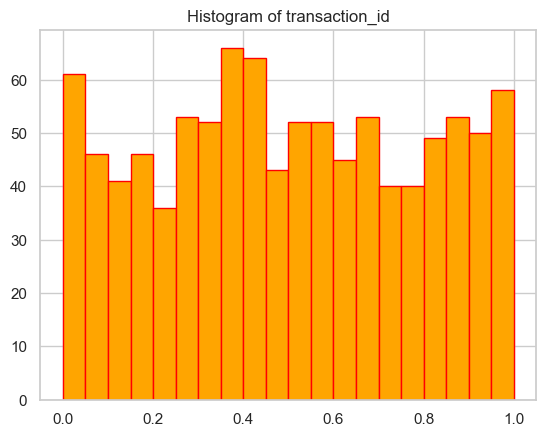

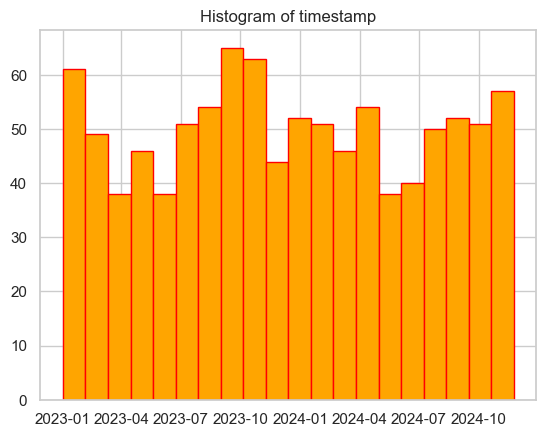

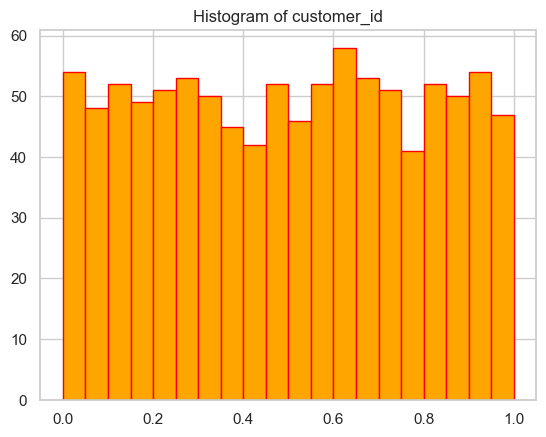

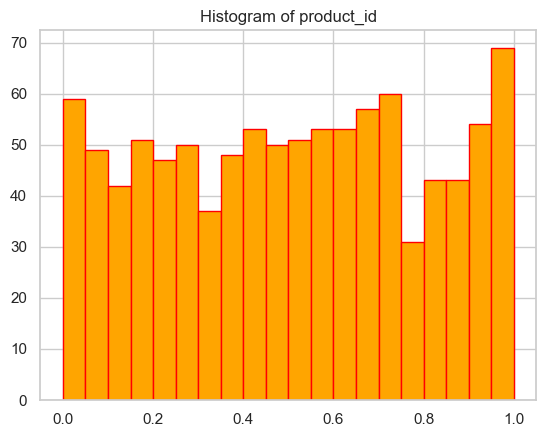

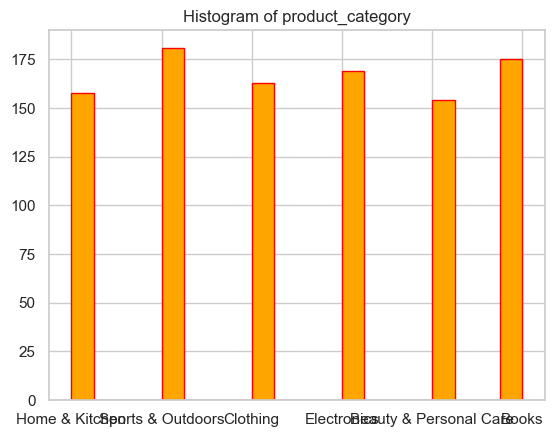

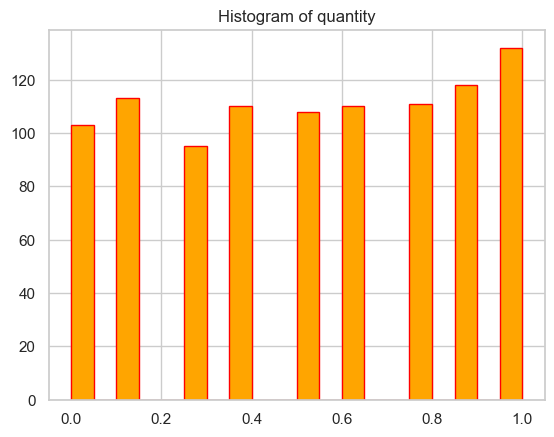

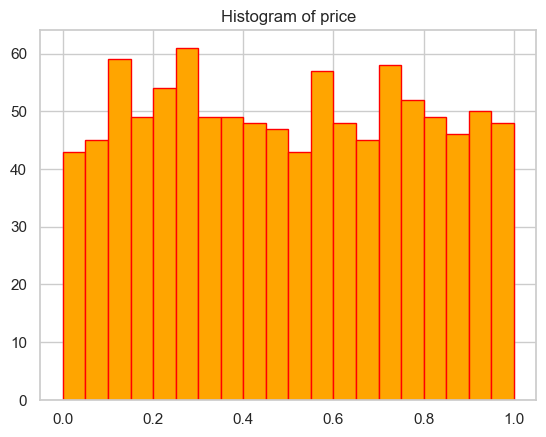

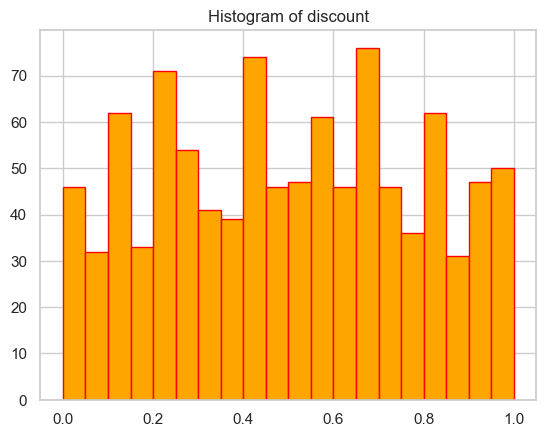

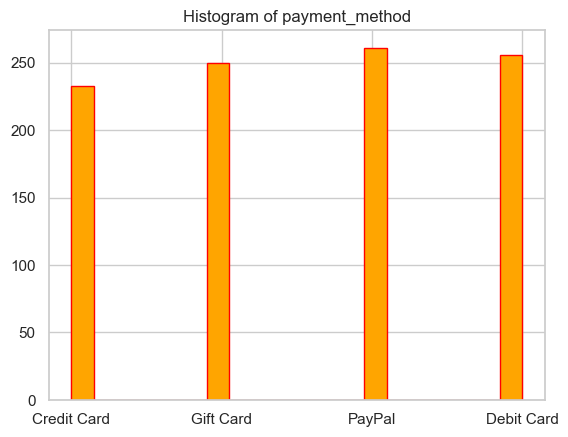

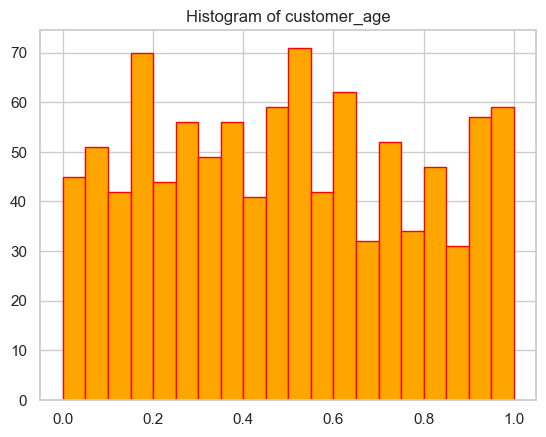

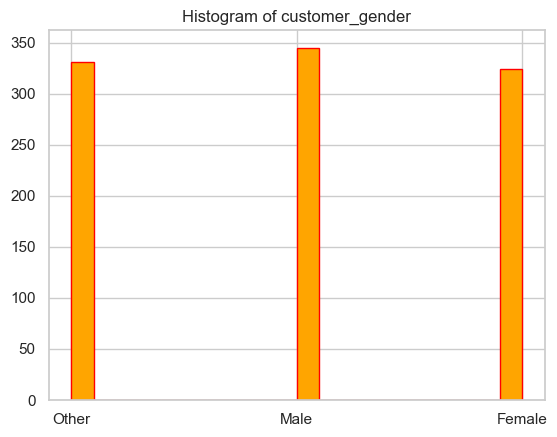

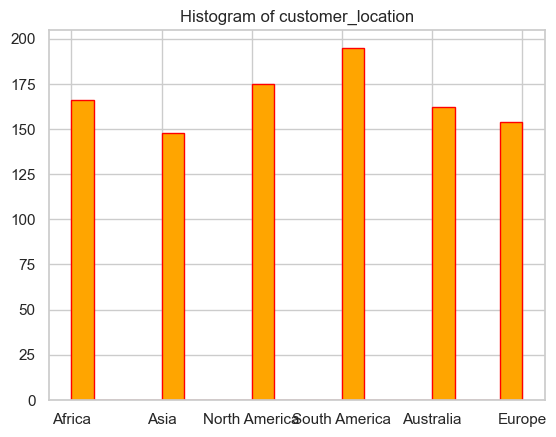

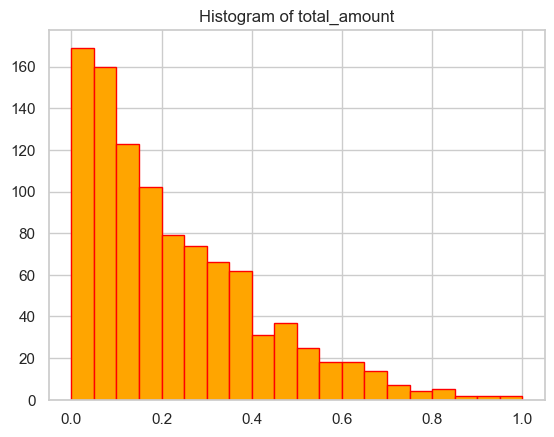

In [14]:
# Histogram
for column in df.columns:
    plt.figure()
    plt.hist(df[column], bins=20, color='orange', edgecolor='red')
    plt.title(f'Histogram of {column}')
    plt.show()

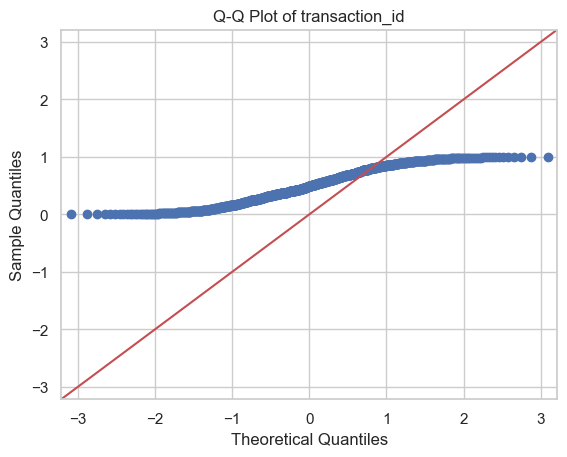

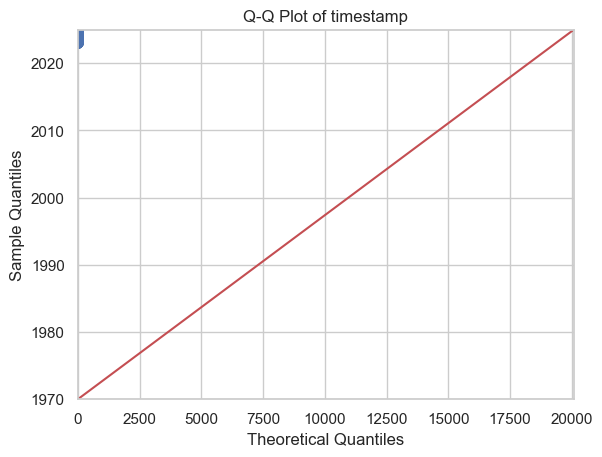

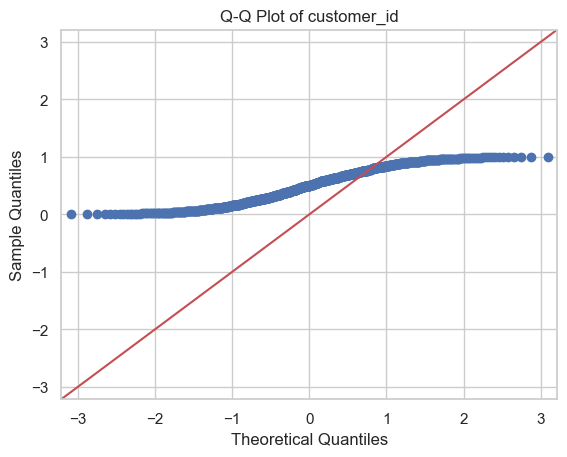

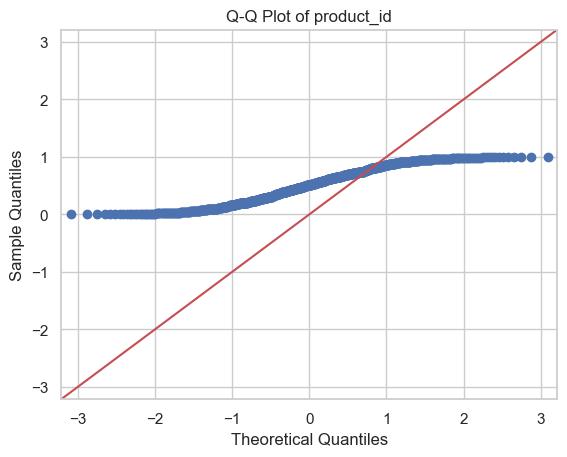

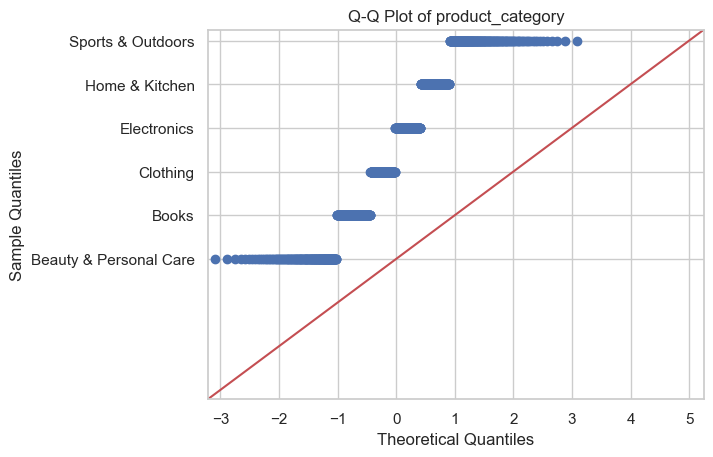

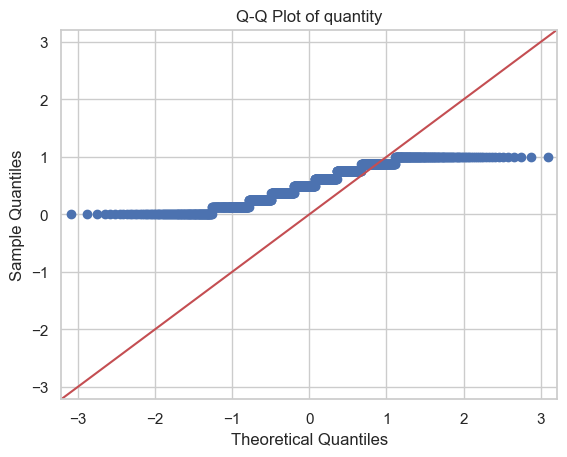

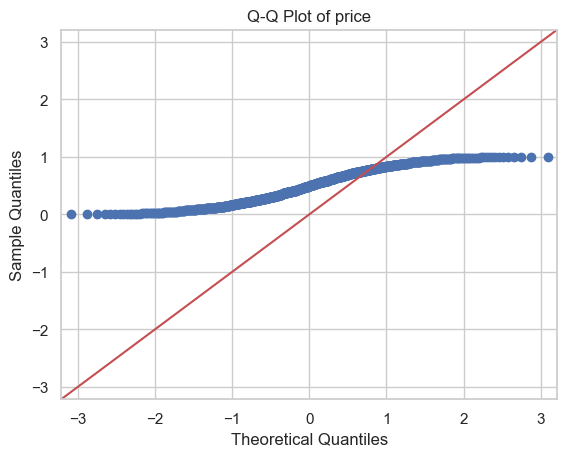

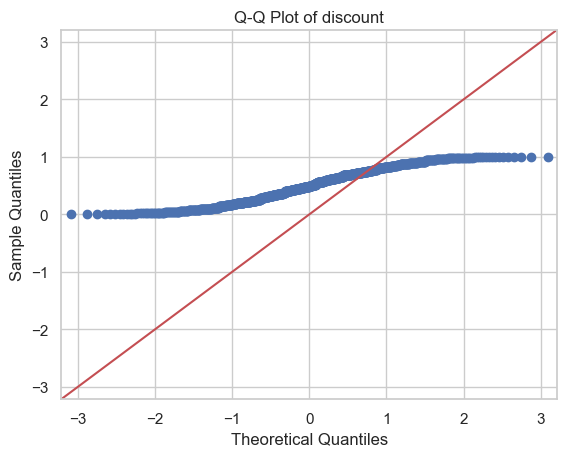

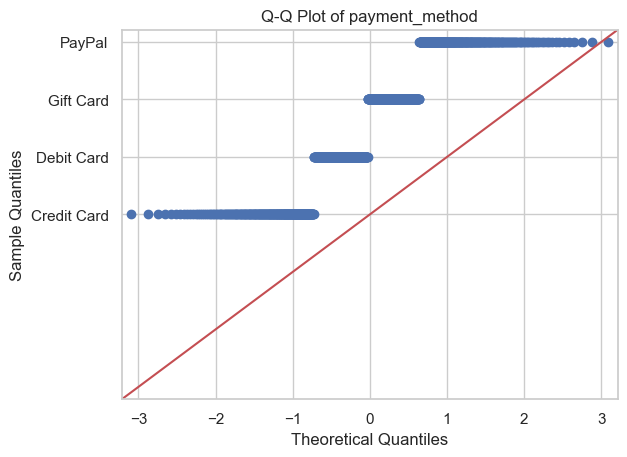

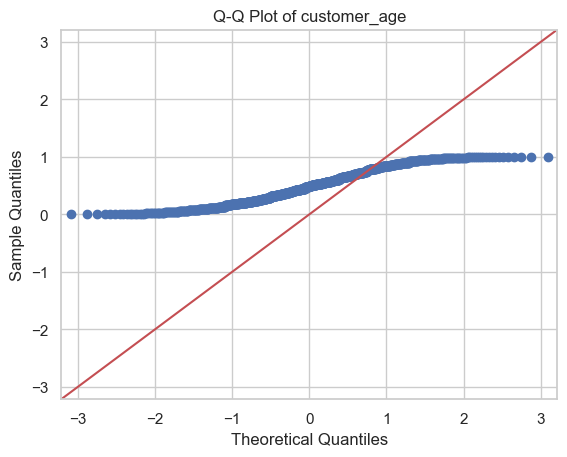

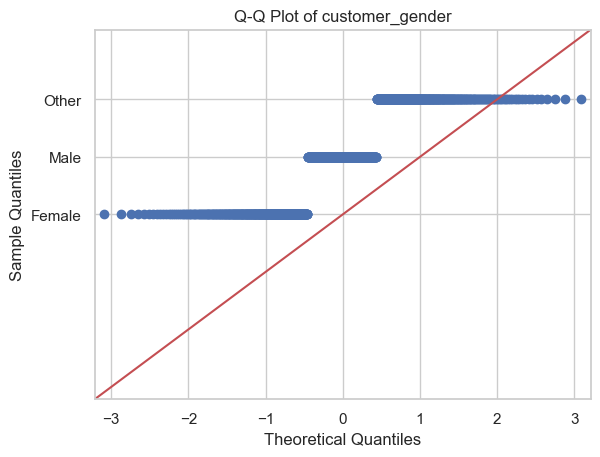

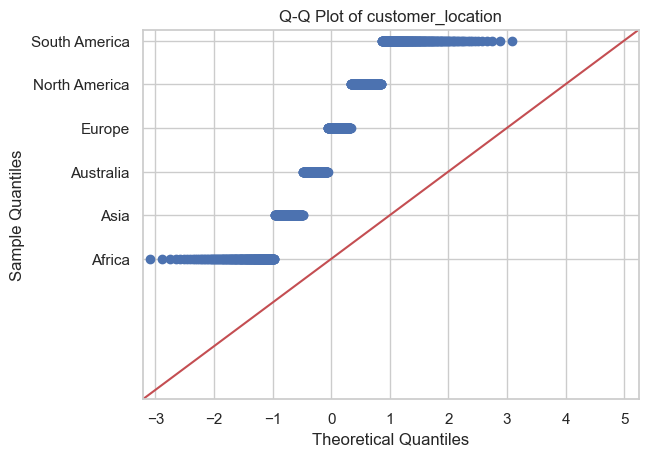

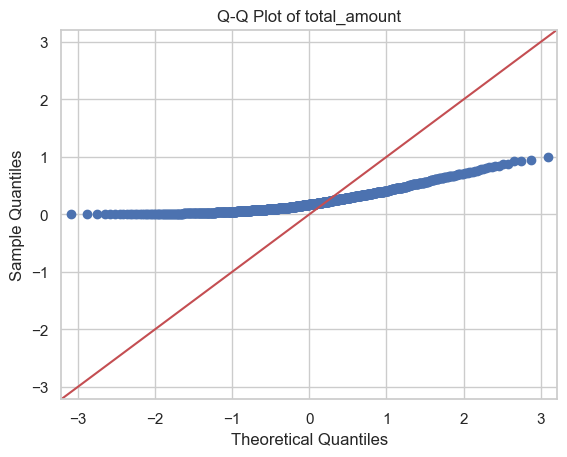

In [15]:
# Q-Q Plot
for column in df.columns:
    sm.qqplot(df[column], line='45')
    plt.title(f'Q-Q Plot of {column}')
    plt.show()

In [20]:
type(numerical_cols)

list

<h4>Test for Normality</h4>

In [21]:
# Shapiro-Wilk
variables = ['transaction_id', 'customer_id', 'product_id',
       'product_category', 'quantity', 'price', 'discount', 'payment_method',
       'customer_age', 'customer_gender', 'customer_location', 'total_amount']
results = {}

for var in numerical_cols:
    stat, p_value = shapiro(df[var])
    results[var] = {'Statistic': stat, 'p-value': p_value}

# Convert results to a DataFrame for better presentation
results_df = pd.DataFrame(results).T
print(results_df)

                Statistic       p-value
transaction_id   0.957075  1.561071e-16
customer_id      0.953631  3.145819e-17
product_id       0.954614  4.924941e-17
quantity         0.926525  1.054105e-21
price            0.954538  4.757340e-17
discount         0.962454  2.307942e-15
customer_age     0.958671  3.383532e-16
total_amount     0.894630  1.342891e-25


In [ ]:
df.columns